# Importing Libraries

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Dataframe

In [2]:
netflix = pd.read_csv("./netflix_titles.csv")
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix.shape

(8807, 12)

# Understand your variables

In [4]:

variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(netflix.columns):
    variables.loc[i] = [var, netflix[var].nunique(), netflix[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,show_id,8807,"[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,..."
1,type,2,"[Movie, TV Show]"
2,title,8807,"[Dick Johnson Is Dead, Blood & Water, Gangland..."
3,director,4528,"[Kirsten Johnson, nan, Julien Leclercq, Mike F..."
4,cast,7692,"[nan, Ama Qamata, Khosi Ngema, Gail Mabalane, ..."
5,country,748,"[United States, South Africa, nan, India, Unit..."
6,date_added,1767,"[September 25, 2021, September 24, 2021, Septe..."
7,release_year,74,"[2020, 2021, 1993, 2018, 1996, 1998, 1997, 201..."
8,rating,17,"[PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ..."
9,duration,220,"[90 min, 2 Seasons, 1 Season, 91 min, 125 min,..."


# Data Preprocessing

### 1. Dealing with Missing values

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [123]:
for i in netflix.columns:
    missing_prop = netflix[i].isna().sum()/netflix.shape[0]*100
    if missing_prop > 0:
        print(i, ' :{:.2f}%'.format(missing_prop))

director  :29.91%
cast  :9.37%
country  :9.44%
date_added  :0.11%
rating  :0.05%
duration  :0.03%


## Adding necessary column

In [8]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['year_added'].fillna(netflix['year_added'].mode()[0],inplace = True)
netflix['year_added'] = netflix['year_added'].astype(int)

## Calculating Movie AND TV Show count

In [9]:
pd.DataFrame(netflix.groupby('type')['type'].count())
type_df = pd.DataFrame(pd.DataFrame(netflix.groupby('type')['type'].count()))
type_df.columns = ['count']

In [10]:
type_df

,count
type,
Movie,6131
TV Show,2676


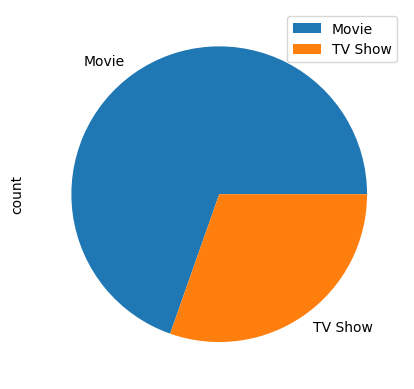

In [11]:
type_df.plot(kind = 'pie', subplots = True)
plt.show()

# Top 10 Genres

In [124]:
#Split values using commas and trim the white spaces for every values
string = str()
for i in netflix['listed_in'].dropna():
    string += i+','
listed_in_list = string.split(',')
listed_in_list.pop()
l1 = list()
for i in listed_in_list:
    l1.append(i.strip())
l1
listed_in_df = pd.DataFrame(l1)
listed_in_df.columns = ['listed_in']
listed_in_df

,listed_in
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows
...,...
19318,Children & Family Movies
19319,Comedies
19320,Dramas
19321,International Movies


In [125]:
#counting similar genres
listed_in_df_c =pd.DataFrame(listed_in_df.groupby('listed_in')['listed_in'].count())
listed_in_df_c.columns = ['count']
listed_in_df_c.sort_values(by = ['count'], ascending = False).head(10)

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


<AxesSubplot:xlabel='listed_in'>

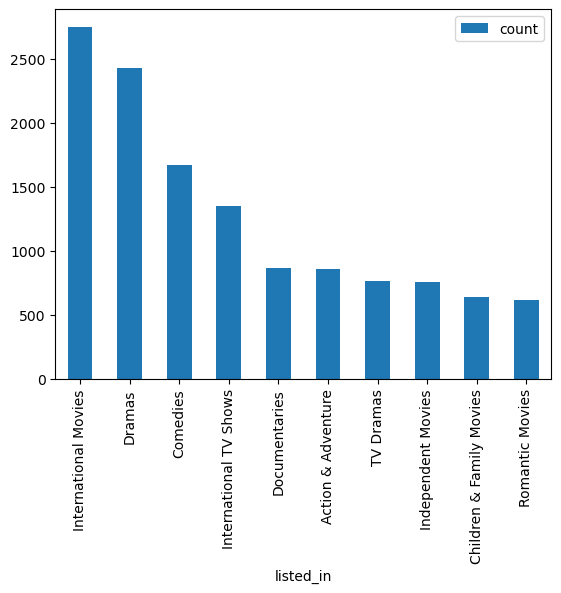

In [126]:
#listed_in_df_c.sort_values(by = ['count'], ascending = False).head(10).to_excel('Top10Genre.xlsx')
listed_in_df_c.sort_values(by = ['count'], ascending = False).head(10).plot.bar()

### Observation: Most of the content are listed in Genre International Movies followed by Dramas and Comedies.

# Top Ratings

In [24]:
rating_df = pd.DataFrame(netflix.groupby('rating')['rating'].count())
rating_df.columns = ['count']
rating_df.sort_values(by = ['count'],ascending =False)
rating_df = rating_df.iloc[3:]
rating_df.sort_values(by = ['count'],ascending =False)

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


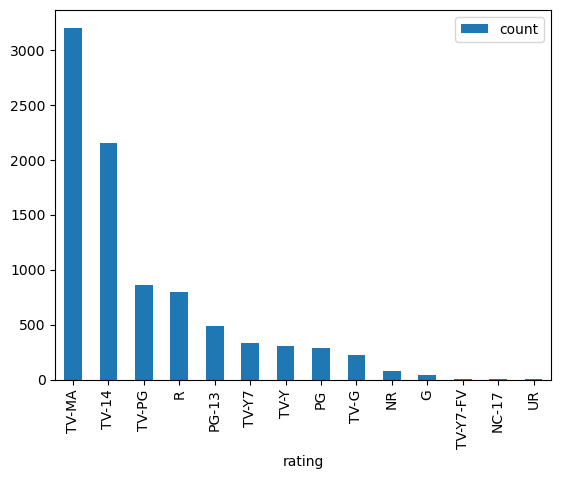

In [25]:
rating_df.sort_values(by = ['count'],ascending =False).plot.bar()
rating_df.sort_values(by = ['count'],ascending =False).to_excel('top10ratings.xlsx')

### Highest number of contents available on netflix are intended for mature, adult audiences and maybe unsuitable for childrens under 17.
### Followed by the contents which are available for under 14, and maybe unsuitable for childrens under 17. 
### Least number of contents are under UR and NC-17, which states the content admitted for No one under 17.
### So, most of the contents are intended for mature and adult audiences above age 17.

# Understanding what content is available in different countries

In [26]:
# spliting the multilpe country values in each row to get count of countries with trimming the white spaces
string = str()
for i in netflix['country'].dropna():
    string += i+','
countries_list = string.split(',')
l1 = list()
for i in countries_list:
    l1.append(i.strip())
l1
country_df = pd.DataFrame(l1)
country_df.columns = ['country']

#Finding count of each country appeared in the netflixset, displaying top 10 of it.
country_count = pd.DataFrame(country_df.groupby('country')['country'].count())
country_count.columns = ['count']
top_10_countries = country_count.sort_values(by = ['count'], ascending = False).head(10)
top_10_countries

,count
country,
United States,3690
India,1046
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226


<AxesSubplot:xlabel='country'>

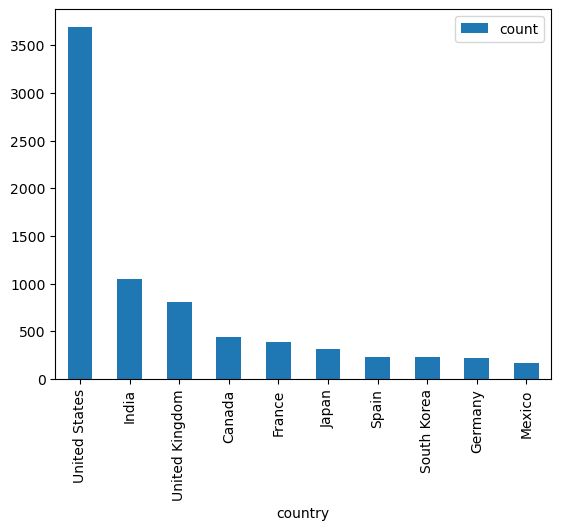

In [27]:
#visualization of above analysis
top_10_countries.plot.bar()

#top_10_countries.to_excel('top10countries.xlsx')

# Top Countries with contents

In [28]:
netflix0 = pd.DataFrame(netflix.loc[:,['type','country']])
netflix0.dropna(inplace = True)
netflix0

,type,country
0,Movie,United States
1,TV Show,South Africa
4,TV Show,India
7,Movie,"United States, Ghana, Burkina Faso, United Kin..."
8,TV Show,United Kingdom
...,...,...
8801,Movie,"United Arab Emirates, Jordan"
8802,Movie,United States
8804,Movie,United States
8805,Movie,United States


In [29]:
gg=netflix0['country'].str.split(',',expand = True)
gg.insert(0,"type",netflix['type'])

In [30]:
gg

,type,0,1,2,3,4,5,6,7,8,9,10,11
0,Movie,United States,None,None,None,None,None,None,None,None,None,None,None
1,TV Show,South Africa,None,None,None,None,None,None,None,None,None,None,None
4,TV Show,India,None,None,None,None,None,None,None,None,None,None,None
7,Movie,United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,None,None,None,None,None,None
8,TV Show,United Kingdom,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,United Arab Emirates,Jordan,None,None,None,None,None,None,None,None,None,None
8802,Movie,United States,None,None,None,None,None,None,None,None,None,None,None
8804,Movie,United States,None,None,None,None,None,None,None,None,None,None,None
8805,Movie,United States,None,None,None,None,None,None,None,None,None,None,None


In [31]:
gg0 = pd.DataFrame([gg['type'],gg[0]])
gg0 = gg0.T

gg1 = pd.DataFrame([gg['type'],gg[1]])
gg1 = gg1.T
gg1.dropna(inplace=True)


gg2 = pd.DataFrame([gg['type'],gg[2]])
gg2 = gg2.T
gg2.dropna(inplace=True)

gg3 = pd.DataFrame([gg['type'],gg[3]])
gg3 = gg3.T
gg3.dropna(inplace=True)

gg4 = pd.DataFrame([gg['type'],gg[4]])
gg4 = gg4.T
gg4.dropna(inplace=True)

gg5 = pd.DataFrame([gg['type'],gg[5]])
gg5 = gg5.T
gg5.dropna(inplace=True)

gg6 = pd.DataFrame([gg['type'],gg[6]])
gg6 = gg6.T
gg6.dropna(inplace=True)

gg7 = pd.DataFrame([gg['type'],gg[7]])
gg7 = gg7.T
gg7.dropna(inplace=True)

gg8 = pd.DataFrame([gg['type'],gg[8]])
gg8 = gg8.T
gg8.dropna(inplace=True)

gg9 = pd.DataFrame([gg['type'],gg[9]])
gg9 = gg9.T
gg9.dropna(inplace=True)

gg10 = pd.DataFrame([gg['type'],gg[10]])
gg10 = gg10.T
gg10.dropna(inplace=True)

gg11 = pd.DataFrame([gg['type'],gg[11]])
gg11 = gg11.T
gg11.dropna(inplace=True)

gg0.columns = ['type','country']
gg1.columns = ['type','country']
gg2.columns = ['type','country']
gg3.columns = ['type','country']
gg4.columns = ['type','country']
gg5.columns = ['type','country']
gg6.columns = ['type','country']
gg7.columns = ['type','country']
gg8.columns = ['type','country']
gg9.columns = ['type','country']
gg10.columns = ['type','country']
gg11.columns = ['type','country']

ggf = pd.concat([gg0,gg1])
ggf = pd.concat([ggf,gg2])
ggf = pd.concat([ggf,gg3])
ggf = pd.concat([ggf,gg4])
ggf = pd.concat([ggf,gg5])
ggf = pd.concat([ggf,gg6])
ggf = pd.concat([ggf,gg7])
ggf = pd.concat([ggf,gg8])
ggf = pd.concat([ggf,gg9])
ggf = pd.concat([ggf,gg10])
ggf = pd.concat([ggf,gg11])

In [43]:
string = str()
for i in ggf['country']:
    string += i+','
countries_list = string.split(',')
l1 = list()
for i in countries_list:
    l1.append(i.strip())
l1
country_df = pd.DataFrame(l1)
country_df.columns = ['country']

In [44]:
ggf['country'] = country_df['country']

In [45]:
ggf

,type,country
0,Movie,United States
1,TV Show,South Africa
4,TV Show,China
7,Movie,United States
8,TV Show,Japan
...,...,...
8403,Movie,South Korea
6233,Movie,United States
8403,Movie,South Korea
6233,Movie,United States


# TOP 10 COUNTRIES WITH MOST NUMBER OF MOVIES

In [46]:
ggf_movie = ggf[ggf['type'] == 'Movie']
ggf_movie

,type,country
0,Movie,United States
7,Movie,United States
9,Movie,India
12,Movie,Nigeria
24,Movie,Australia
...,...,...
8403,Movie,South Korea
6233,Movie,United States
8403,Movie,South Korea
6233,Movie,United States


In [47]:
ggf_movie_count = pd.DataFrame(ggf_movie.groupby('country')['country'].count())
ggf_movie_count.columns = ['count']
ggf_movie_count.sort_values(by = ['count'], ascending = False).head(10)

,count
country,
United States,2918
India,820
United Kingdom,555
Canada,286
France,219
Japan,217
South Korea,186
Spain,155
Germany,142


<AxesSubplot:xlabel='Country', ylabel='Movies count'>

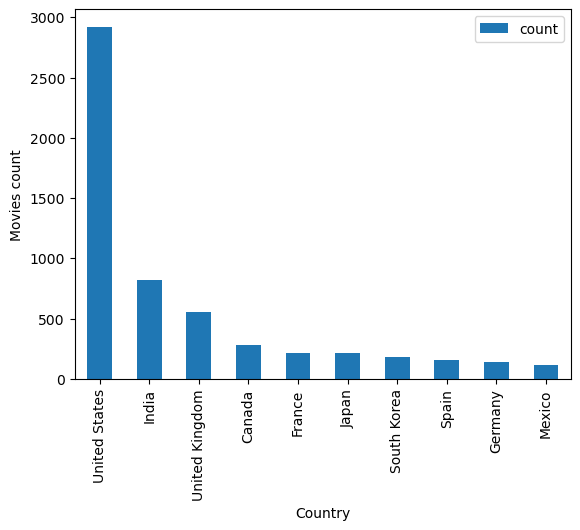

In [48]:
#ggf_movie_count.sort_values(by = ['count'], ascending = False).head(10).to_excel('top_10_countries_in_movies.xlsx')
ggf_movie_count.sort_values(by = ['count'], ascending = False).head(10).plot.bar(ylabel='Movies count' ,xlabel = 'Country')

# TOP 10 COUNTRIES WITH MOST NUMBER OF TV SHOWS


In [49]:
ggf_tv_show = ggf[ggf['type'] == 'TV Show']
ggf_tv_show

,type,country
1,TV Show,South Africa
4,TV Show,China
8,TV Show,Japan
15,TV Show,United States
17,TV Show,South Korea
...,...,...
4676,TV Show,Egypt
6810,TV Show,Uruguay
8411,TV Show,United States
1506,TV Show,India


In [50]:
ggf_tv_show_count = pd.DataFrame(ggf_tv_show.groupby('country')['country'].count())
ggf_tv_show_count.columns = ['count']
ggf_tv_show_count.sort_values(by = ['count'], ascending = False).head(10)

,count
country,
United States,989
India,353
United Kingdom,184
Canada,127
France,89
South Korea,80
Spain,73
Japan,71
Mexico,51


<AxesSubplot:xlabel='Country', ylabel='TV Show count'>

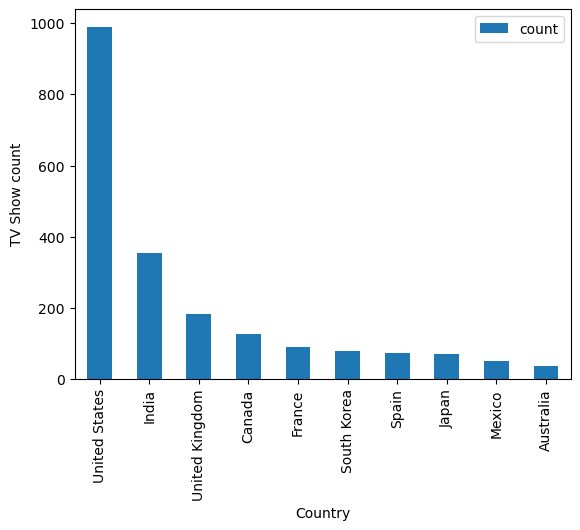

In [51]:
#ggf_tv_show_count.sort_values(by = ['count'], ascending = False).head(10).to_excel('top_10_countries_in_TV_Shows.xlsx')
ggf_tv_show_count.sort_values(by = ['count'], ascending = False).head(10).plot.bar(ylabel='TV Show count' ,xlabel = 'Country')

# Countries with Genre

In [52]:
netflix1 = netflix.loc[:,['show_id','country','listed_in']]

In [53]:
netflix1.head()

,show_id,country,listed_in
0,s1,United States,Documentaries
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,NaN,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,NaN,"Docuseries, Reality TV"
4,s5,India,"International TV Shows, Romantic TV Shows, TV ..."


In [54]:
netflix1.isna().sum()

show_id        0
country      831
listed_in      0
dtype: int64

In [55]:
netflix1.dropna(inplace = True)

In [56]:
#splitting column country
ctry=netflix1['country'].str.split(',',expand = True)
ctry.columns = ['0','1','2','3','4','5','6','7','8','9','10','11']
ctry.insert(0,"show_id",netflix1['show_id'])

#splitting column listed_in
lstn = netflix1['listed_in'].str.split(',',expand = True)
lstn.columns = ['0','1','2']
lstn.insert(0,"show_id",netflix1['show_id'])

#retrieving 1st split from country_split as------------------>A
ctry0 = ctry.loc[:,['show_id','0']]
ctry0.columns = ['show_id','country']

#retrieving 1st split from listed_in_split as----------------->X
lstn0 = lstn.loc[:,['show_id','0']]
lstn0.columns = ['show_id','listed_in']

#merge------------------------------------------------------->A * X
temp0 = ctry0.merge(lstn0, how = 'inner')

#retrieving 2nd split from listed_in_split as----------------->Y
lstn1 = lstn.loc[:,['show_id','1']]
lstn1.columns = ['show_id','listed_in']
lstn1.dropna(inplace = True)

#new merge--------------------------------------------------->A * Y
temp1 = ctry0.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp1 = (A*X) + (A*Y)
temp1 = pd.concat([temp0,temp1])

##retrieving 3rd split from listed_in_split as -------------->Z
lstn2 = lstn.loc[:,['show_id','2']]
lstn2.columns = ['show_id','listed_in']
lstn2.dropna(inplace = True)

#new merge----------------------------------------------->A * Z
temp2 = ctry0.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp2 = temp1 + (A * Z)
temp2 = pd.concat([temp1,temp2])   #----------------------------------------------------->Final_1
temp2

,show_id,country,listed_in
0,s1,United States,Documentaries
1,s2,South Africa,International TV Shows
2,s5,India,International TV Shows
3,s8,United States,Dramas
4,s9,United Kingdom,British TV Shows
...,...,...,...
3423,s8799,India,International Movies
3424,s8801,Pakistan,TV Dramas
3425,s8802,United Arab Emirates,Thrillers
3426,s8803,United States,Thrillers


In [57]:
#retrieving 1st split from country_split as------------------>B
ctry1 = ctry.loc[:,['show_id','1']]
ctry1.dropna(inplace = True)
ctry1.columns = ['show_id','country']
ctry1

#merge------------------------------------------------------->B * X
temp00 = ctry1.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->B * Y
temp01 = ctry1.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp1 = (B*X) + (B*Y)
temp01 = pd.concat([temp00,temp01])

#new merge----------------------------------------------->B * Z
temp02 = ctry1.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp2 = temp1 + (B * Z)
temp02 = pd.concat([temp01,temp02])
temp02

,show_id,country,listed_in
0,s8,Ghana,Dramas
1,s13,Czech Republic,Dramas
2,s30,India,Thrillers
3,s39,Canada,Action & Adventure
4,s47,United States,Action & Adventure
...,...,...,...
498,s8730,United States,Dramas
499,s8746,East Germany,Comedies
500,s8775,Austria,International Movies
501,s8795,France,International Movies


In [58]:
#retrieving 1st split from country_split as------------------>C
ctry2 = ctry.loc[:,['show_id','2']]
ctry2.dropna(inplace = True)
ctry2.columns = ['show_id','country']
ctry2

#merge------------------------------------------------------->C * X
temp10 = ctry2.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp11 = ctry2.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp11 = pd.concat([temp10,temp11])

#new merge----------------------------------------------->C * Z
temp12 = ctry2.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp12 = pd.concat([temp11,temp12])
temp12

,show_id,country,listed_in
0,s8,Burkina Faso,Dramas
1,s30,France,Thrillers
2,s39,United States,Action & Adventure
3,s47,Japan,Action & Adventure
4,s116,France,Dramas
...,...,...,...
156,s8669,Germany,Sci-Fi & Fantasy
157,s8704,United States,Music & Musicals
158,s8730,United Kingdom,Dramas
159,s8746,West Germany,Comedies


In [59]:
#retrieving 1st split from country_split as------------------>D
ctry3 = ctry.loc[:,['show_id','3']]
ctry3.dropna(inplace = True)
ctry3.columns = ['show_id','country']
ctry3

#merge------------------------------------------------------->C * X
temp20 = ctry3.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp21 = ctry3.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp21 = pd.concat([temp20,temp21])

#new merge----------------------------------------------->C * Z
temp22 = ctry3.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp22 = pd.concat([temp21,temp22])
temp22

,show_id,country,listed_in
0,s8,United Kingdom,Dramas
1,s123,United States,Thrillers
2,s136,Japan,Action & Adventure
3,s137,United Kingdom,Dramas
4,s268,United States,Classic Movies
...,...,...,...
58,s8399,France,Romantic Movies
59,s8412,Germany,Science & Nature TV
60,s8497,Sweden,International Movies
61,s8639,United Kingdom,Independent Movies


In [60]:
#retrieving 1st split from country_split as------------------>D
ctry4 = ctry.loc[:,['show_id','4']]
ctry4.dropna(inplace = True)
ctry4.columns = ['show_id','country']
ctry4

#merge------------------------------------------------------->C * X
temp30 = ctry4.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp31 = ctry4.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp31 = pd.concat([temp30,temp31])

#new merge----------------------------------------------->C * Z
temp32 = ctry4.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp32 = pd.concat([temp31,temp32])
temp32

,show_id,country,listed_in
0,s8,Germany,Dramas
1,s390,United Kingdom,Dramas
2,s1076,India,Docuseries
3,s1139,United States,Dramas
4,s1146,United States,Dramas
...,...,...,...
21,s8226,United Kingdom,International Movies
22,s8255,Belgium,Sci-Fi & Fantasy
23,s8399,Netherlands,Romantic Movies
24,s8412,Greece,Science & Nature TV


In [61]:
#retrieving 1st split from country_split as------------------>D
ctry5 = ctry.loc[:,['show_id','5']]
ctry5.dropna(inplace = True)
ctry5.columns = ['show_id','country']
ctry5

#merge------------------------------------------------------->C * X
temp40 = ctry5.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp41 = ctry5.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp41 = pd.concat([temp40,temp41])

#new merge----------------------------------------------->C * Z
temp42 = ctry5.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp42 = pd.concat([temp41,temp42])
temp42

,show_id,country,listed_in
0,s8,Ethiopia,Dramas
1,s1507,Japan,British TV Shows
2,s1550,Belgium,Dramas
3,s1998,China,Action & Adventure
4,s2512,United States,Dramas
5,s2563,South Korea,Children & Family Movies
6,s3126,Japan,Dramas
7,s3392,United States,Dramas
8,s4677,Germany,Reality TV
9,s4928,Singapore,Action & Adventure


In [62]:
#retrieving 1st split from country_split as------------------>D
ctry6 = ctry.loc[:,['show_id','6']]
ctry6.dropna(inplace = True)
ctry6.columns = ['show_id','country']
ctry6

#merge------------------------------------------------------->C * X
temp50 = ctry6.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp51 = ctry6.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp51 = pd.concat([temp50,temp51])

#new merge----------------------------------------------->C * Z
temp52 = ctry6.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp52 = pd.concat([temp51,temp52])
temp52

,show_id,country,listed_in
0,s1507,France,British TV Shows
1,s1550,United Kingdom,Dramas
2,s1998,Germany,Action & Adventure
3,s2563,United States,Children & Family Movies
4,s6234,New Zealand,Documentaries
5,s6624,United Kingdom,International Movies
6,s8226,India,Children & Family Movies
7,s8255,United States,Dramas
8,s8404,France,Documentaries
0,s1507,France,Kids' TV


In [63]:
#retrieving 1st split from country_split as------------------>D
ctry7 = ctry.loc[:,['show_id','7']]
ctry7.dropna(inplace = True)
ctry7.columns = ['show_id','country']
ctry7

#merge------------------------------------------------------->C * X
temp60 = ctry7.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp61 = ctry7.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp61 = pd.concat([temp60,temp61])

#new merge----------------------------------------------->C * Z
temp62 = ctry7.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp62 = pd.concat([temp61,temp62])
temp62

,show_id,country,listed_in
0,s1507,Ireland,British TV Shows
1,s1550,Hong Kong,Dramas
2,s6234,Philippines,Documentaries
3,s8404,United States,Documentaries
0,s1507,Ireland,Kids' TV
1,s1550,Hong Kong,Independent Movies
2,s6234,Philippines,International Movies
3,s8404,United States,International Movies
0,s1507,Ireland,TV Comedies


In [64]:
#retrieving 1st split from country_split as------------------>D
ctry8 = ctry.loc[:,['show_id','8']]
ctry8.dropna(inplace = True)
ctry8.columns = ['show_id','country']
ctry8

#merge------------------------------------------------------->C * X
temp70 = ctry8.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp71 = ctry8.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp71 = pd.concat([temp70,temp71])

#new merge----------------------------------------------->C * Z
temp72 = ctry8.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp72 = pd.concat([temp71,temp72])
temp72

,show_id,country,listed_in
0,s6234,South Africa,Documentaries
1,s8404,Germany,Documentaries
0,s6234,South Africa,International Movies
1,s8404,Germany,International Movies


In [65]:
#retrieving 1st split from country_split as------------------>D
ctry9 = ctry.loc[:,['show_id','9']]
ctry9.dropna(inplace = True)
ctry9.columns = ['show_id','country']
ctry9

#merge------------------------------------------------------->C * X
temp80 = ctry9.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp81 = ctry9.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp81 = pd.concat([temp80,temp81])

#new merge----------------------------------------------->C * Z
temp82 = ctry9.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp82 = pd.concat([temp81,temp82])
temp82

,show_id,country,listed_in
0,s6234,Sweden,Documentaries
1,s8404,Netherlands,Documentaries
0,s6234,Sweden,International Movies
1,s8404,Netherlands,International Movies


In [66]:
#retrieving 1st split from country_split as------------------>D
ctry10 = ctry.loc[:,['show_id','10']]
ctry10.dropna(inplace = True)
ctry10.columns = ['show_id','country']
ctry10

#merge------------------------------------------------------->C * X
temp90 = ctry10.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp91 = ctry10.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp91 = pd.concat([temp90,temp91])

#new merge----------------------------------------------->C * Z
temp92 = ctry10.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp92 = pd.concat([temp91,temp92])
temp92

,show_id,country,listed_in
0,s6234,United States,Documentaries
0,s6234,United States,International Movies


In [67]:
#retrieving 1st split from country_split as------------------>D
ctry11 = ctry.loc[:,['show_id','11']]
ctry11.dropna(inplace = True)
ctry11.columns = ['show_id','country']
ctry11

#merge------------------------------------------------------->C * X
temp100 = ctry11.merge(lstn0, how = 'inner')

#new merge--------------------------------------------------->C * Y
temp101 = ctry11.merge(lstn1, how = 'inner')

#Union------------------------------------------------------>temp11 = (C*X) + (C*Y)
temp101 = pd.concat([temp100,temp101])

#new merge----------------------------------------------->C * Z
temp102 = ctry11.merge(lstn2, how = 'inner')
#Union--------------------------------------------------->temp12 = temp1 + (C * Z)
temp102 = pd.concat([temp101,temp102])
temp102

,show_id,country,listed_in
0,s6234,Uruguay,Documentaries
0,s6234,Uruguay,International Movies


### Final = temp2 + temp02
### Final += temp12
### Final += temp22
### Final += temp32
### Final += temp42
### Final += temp52
### Final += temp62
### Final += temp72
### Final += temp82
### Final += temp92
### Final += temp102

In [71]:
final = pd.concat([temp2,temp02,temp12,temp22,temp32, temp42, temp52, temp62, temp72, temp82, temp92, temp102])

,show_id,country,listed_in
0,s1,United States,Documentaries
1,s2,South Africa,International TV Shows
2,s5,India,International TV Shows
3,s8,United States,Dramas
4,s9,United Kingdom,British TV Shows
...,...,...,...
1,s8404,Netherlands,International Movies
0,s6234,United States,Documentaries
0,s6234,United States,International Movies
0,s6234,Uruguay,Documentaries


In [79]:
string = str()
for i in final['country'].dropna():
    string += i + ','
country_list = string.split(',')
country_list.pop()
l1 = list()
for i in country_list:
    l1.append(i.strip())
l1
final['country'] = pd.DataFrame(l1)

string = str()
for i in final['listed_in'].dropna():
    string += i + ','
genre_list = string.split(',')
genre_list.pop()
l1 = list()
for i in genre_list:
    l1.append(i.strip())
l1
final['listed_in'] = pd.DataFrame(l1)

In [ ]:
final[final['show_id'] == 's194']

In [115]:
final['country'] = final.country.replace('',np.nan,regex = True)

,show_id,country,listed_in
0,s1,United States,Documentaries
1,s2,South Africa,International TV Shows
2,s5,India,International TV Shows
3,s8,United States,Dramas
4,s9,United Kingdom,British TV Shows
...,...,...,...
1,s8404,South Africa,International TV Shows
0,s6234,United States,Documentaries
0,s6234,United States,Documentaries
0,s6234,United States,Documentaries


In [119]:
final.dropna(inplace = True)

In [116]:
#set index before exporting
#final.set_index('show_id',inplace  = True)
final.to_excel('final.xlsx')

# Similar Content on Netflix

In [76]:
nf_movies = netflix[netflix['type']=='Movie']
nf_tv = netflix[netflix['type']=='TV Show']

description_mov = ''.join(nf_movies['description'].unique())
description_tv  = ''.join(nf_tv['description'].unique())

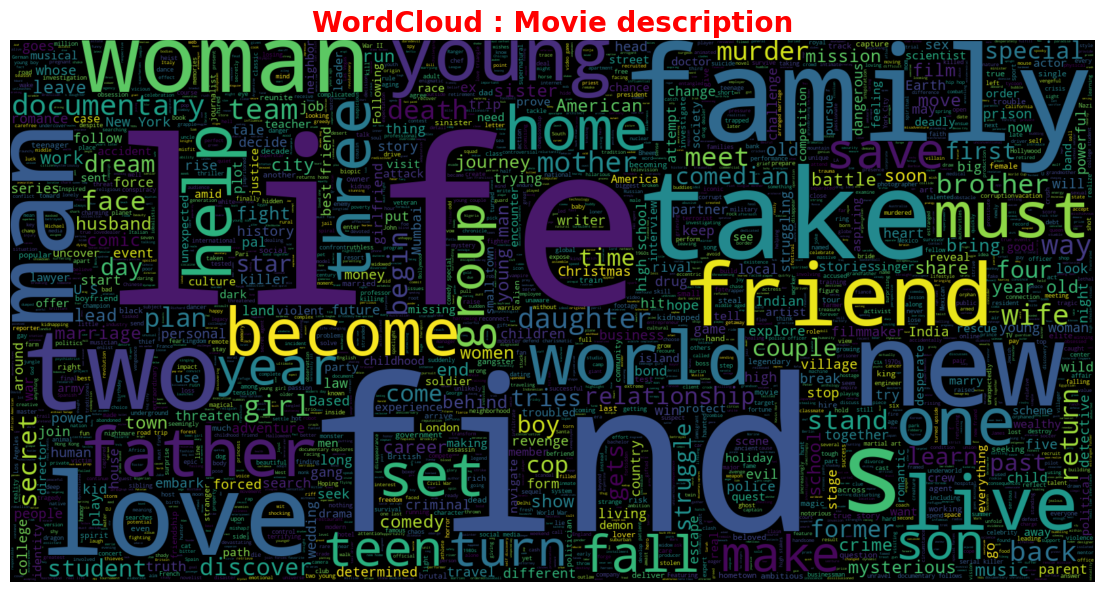

In [122]:
plt.figure(figsize=(14,14))
wordcloud1 = WordCloud(max_words=1000000,background_color="black",width=1600, height=800).generate(description_mov)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud : Movie description', fontsize = 20, color='r', weight='semibold')
plt.show()

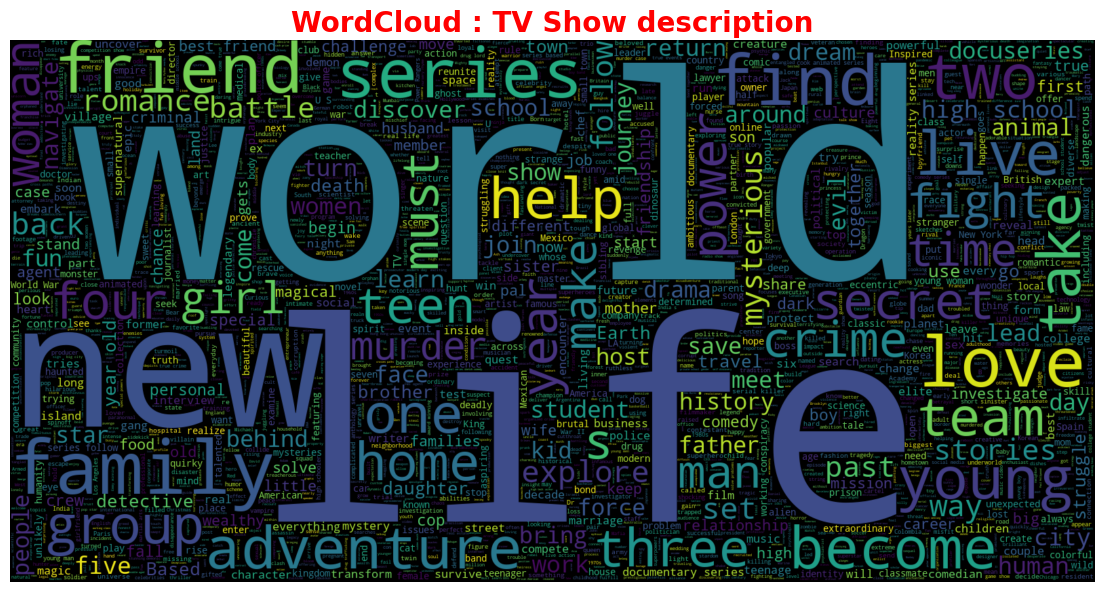

In [121]:
plt.figure(figsize=(14,14))
wordcloud1 = WordCloud(max_words=1000000,background_color="black",width=1600, height=800).generate(description_tv)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud : TV Show description', fontsize = 20, color='r', weight='semibold')
plt.show()

# Similar Content using different approach but almost same

In [13]:
netflix2 = pd.DataFrame(netflix['description'].unique())
netflix2

,0
0,"As her father nears the end of his life, filmm..."
1,"After crossing paths at a party, a Cape Town t..."
2,To protect his family from a powerful drug lor...
3,"Feuds, flirtations and toilet talk go down amo..."
4,In a city of coaching centers known to train I...
...,...
8770,"A political cartoonist, a crime reporter and a..."
8771,"While living alone in a spooky town, a young g..."
8772,Looking to survive in a world taken over by zo...
8773,"Dragged from civilian life, a former superhero..."


# Text Pre-Preprocessing
1. Removing punctuations like . , ! $( ) * % @
2. Removing URLs
3. Removing Stop words
4. Lower casing
5. Tokenization
6. Stemming
7. Lemmatization

In [272]:
# Punctuation Removal: 
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
netflix2['clean_msg']= netflix2['description'].apply(lambda x:remove_punctuation(x))

netflix2

,description,clean_msg
0,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmma...
1,"After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town te...
2,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...
3,"Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amon...
4,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...
...,...,...
8802,"A political cartoonist, a crime reporter and a...",A political cartoonist a crime reporter and a ...
8803,"While living alone in a spooky town, a young g...",While living alone in a spooky town a young gi...
8804,Looking to survive in a world taken over by zo...,Looking to survive in a world taken over by zo...
8805,"Dragged from civilian life, a former superhero...",Dragged from civilian life a former superhero ...


In [273]:
#  Lowering the text: 

netflix2['msg_lower']= netflix2['clean_msg'].apply(lambda x: x.lower())

netflix2

,description,clean_msg,msg_lower
0,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmma...,as her father nears the end of his life filmma...
1,"After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town te...,after crossing paths at a party a cape town te...
2,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,to protect his family from a powerful drug lor...
3,"Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amon...,feuds flirtations and toilet talk go down amon...
4,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,in a city of coaching centers known to train i...
...,...,...,...
8802,"A political cartoonist, a crime reporter and a...",A political cartoonist a crime reporter and a ...,a political cartoonist a crime reporter and a ...
8803,"While living alone in a spooky town, a young g...",While living alone in a spooky town a young gi...,while living alone in a spooky town a young gi...
8804,Looking to survive in a world taken over by zo...,Looking to survive in a world taken over by zo...,looking to survive in a world taken over by zo...
8805,"Dragged from civilian life, a former superhero...",Dragged from civilian life a former superhero ...,dragged from civilian life a former superhero ...


In [274]:
# Tokenization: 
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
netflix2['msg_tokenied']= netflix2['msg_lower'].apply(lambda x: tokenization(x))
netflix2

,description,clean_msg,msg_lower,msg_tokenied
0,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmma...,as her father nears the end of his life filmma...,[as her father nears the end of his life filmm...
1,"After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town te...,after crossing paths at a party a cape town te...,[after crossing paths at a party a cape town t...
2,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,to protect his family from a powerful drug lor...,[to protect his family from a powerful drug lo...
3,"Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amon...,feuds flirtations and toilet talk go down amon...,[feuds flirtations and toilet talk go down amo...
4,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,in a city of coaching centers known to train i...,[in a city of coaching centers known to train ...
...,...,...,...,...
8802,"A political cartoonist, a crime reporter and a...",A political cartoonist a crime reporter and a ...,a political cartoonist a crime reporter and a ...,[a political cartoonist a crime reporter and a...
8803,"While living alone in a spooky town, a young g...",While living alone in a spooky town a young gi...,while living alone in a spooky town a young gi...,[while living alone in a spooky town a young g...
8804,Looking to survive in a world taken over by zo...,Looking to survive in a world taken over by zo...,looking to survive in a world taken over by zo...,[looking to survive in a world taken over by z...
8805,"Dragged from civilian life, a former superhero...",Dragged from civilian life a former superhero ...,dragged from civilian life a former superhero ...,[dragged from civilian life a former superhero...


In [275]:
# Stop word removal: 
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
netflix2['no_stopwords']= netflix2['msg_tokenied'].apply(lambda x:remove_stopwords(x))
netflix2

,description,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmma...,as her father nears the end of his life filmma...,[as her father nears the end of his life filmm...,[as her father nears the end of his life filmm...
1,"After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town te...,after crossing paths at a party a cape town te...,[after crossing paths at a party a cape town t...,[after crossing paths at a party a cape town t...
2,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,to protect his family from a powerful drug lor...,[to protect his family from a powerful drug lo...,[to protect his family from a powerful drug lo...
3,"Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amon...,feuds flirtations and toilet talk go down amon...,[feuds flirtations and toilet talk go down amo...,[feuds flirtations and toilet talk go down amo...
4,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,in a city of coaching centers known to train i...,[in a city of coaching centers known to train ...,[in a city of coaching centers known to train ...
...,...,...,...,...,...
8802,"A political cartoonist, a crime reporter and a...",A political cartoonist a crime reporter and a ...,a political cartoonist a crime reporter and a ...,[a political cartoonist a crime reporter and a...,[a political cartoonist a crime reporter and a...
8803,"While living alone in a spooky town, a young g...",While living alone in a spooky town a young gi...,while living alone in a spooky town a young gi...,[while living alone in a spooky town a young g...,[while living alone in a spooky town a young g...
8804,Looking to survive in a world taken over by zo...,Looking to survive in a world taken over by zo...,looking to survive in a world taken over by zo...,[looking to survive in a world taken over by z...,[looking to survive in a world taken over by z...
8805,"Dragged from civilian life, a former superhero...",Dragged from civilian life a former superhero ...,dragged from civilian life a former superhero ...,[dragged from civilian life a former superhero...,[dragged from civilian life a former superhero...


In [276]:
# Stemming: 
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
netflix2['msg_lemmatized']=netflix2['no_stopwords'].apply(lambda x:lemmatizer(x))
netflix2

,description,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_lemmatized
0,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmma...,as her father nears the end of his life filmma...,[as her father nears the end of his life filmm...,[as her father nears the end of his life filmm...,[as her father nears the end of his life filmm...
1,"After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town te...,after crossing paths at a party a cape town te...,[after crossing paths at a party a cape town t...,[after crossing paths at a party a cape town t...,[after crossing paths at a party a cape town t...
2,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,to protect his family from a powerful drug lor...,[to protect his family from a powerful drug lo...,[to protect his family from a powerful drug lo...,[to protect his family from a powerful drug lo...
3,"Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amon...,feuds flirtations and toilet talk go down amon...,[feuds flirtations and toilet talk go down amo...,[feuds flirtations and toilet talk go down amo...,[feuds flirtations and toilet talk go down amo...
4,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,in a city of coaching centers known to train i...,[in a city of coaching centers known to train ...,[in a city of coaching centers known to train ...,[in a city of coaching centers known to train ...
...,...,...,...,...,...,...
8802,"A political cartoonist, a crime reporter and a...",A political cartoonist a crime reporter and a ...,a political cartoonist a crime reporter and a ...,[a political cartoonist a crime reporter and a...,[a political cartoonist a crime reporter and a...,[a political cartoonist a crime reporter and a...
8803,"While living alone in a spooky town, a young g...",While living alone in a spooky town a young gi...,while living alone in a spooky town a young gi...,[while living alone in a spooky town a young g...,[while living alone in a spooky town a young g...,[while living alone in a spooky town a young g...
8804,Looking to survive in a world taken over by zo...,Looking to survive in a world taken over by zo...,looking to survive in a world taken over by zo...,[looking to survive in a world taken over by z...,[looking to survive in a world taken over by z...,[looking to survive in a world taken over by z...
8805,"Dragged from civilian life, a former superhero...",Dragged from civilian life a former superhero ...,dragged from civilian life a former superhero ...,[dragged from civilian life a former superhero...,[dragged from civilian life a former superhero...,[dragged from civilian life a former superhero...


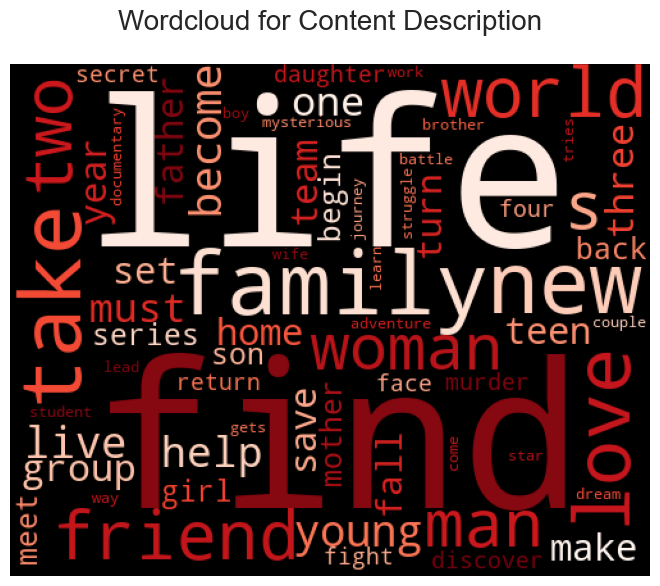

In [277]:
all_words = '' 

# to extract most common words
for arg in netflix2["msg_lemmatized"]: 
    arg = str(arg)
    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400, 
                colormap="Reds", 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Wordcloud for Content Description", fontsize=20, y=1.05) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1)
plt.show()

# Network Analysis on Actors/Directors

In [69]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021


In [112]:
# TOP 10 ACTORS
cast_df = pd.DataFrame(netflix['cast'].dropna())

string = str()
for i in cast_df['cast']:
    string += i + ','
cast_list = string.split(',')
cast_list.pop()
l1 = list()
for i in cast_list:
    l1.append(i.strip())
l1
cast_df = pd.DataFrame(l1)
cast_df.columns = ['cast']

In [103]:
cast_df_c =pd.DataFrame(cast_df.groupby('cast')['cast'].count())
cast_df_c.columns = ['count']
cast_df_c.sort_values(by = ['count'], ascending = False).head(10)

,count
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


<AxesSubplot:xlabel='cast'>

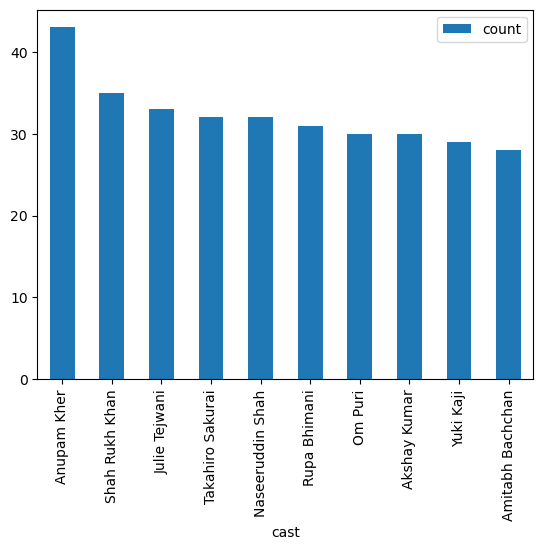

In [73]:
cast_df_c.sort_values(by = ['count'], ascending = False).head(10).plot.bar()
#cast_df_c.sort_values(by = ['count'], ascending = False).head(10).to_excel('to_10_actors.xlsx')

In [74]:
# Actors in Movies and TV Shows
cast_netflix = pd.DataFrame(netflix.loc[:,['type','cast']])
cast_netflix.dropna(inplace = True)
cast_netflix

,type,cast
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,TV Show,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,Movie,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
...,...,...
8801,Movie,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ..."
8802,Movie,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8804,Movie,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,Movie,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [75]:
## TOP 10 MOVIE ACTORS
movie_cast = cast_netflix[cast_netflix['type'] == 'Movie']
movie_cast

,type,cast
6,Movie,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
7,Movie,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D..."
9,Movie,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T..."
12,Movie,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ..."
13,Movie,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc..."
...,...,...
8801,Movie,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ..."
8802,Movie,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8804,Movie,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,Movie,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [111]:
string = str()
for i in movie_cast['cast']:
    string += i+','
cast_list = string.split(',')
cast_list.pop()
l1 = list()
for i in cast_list:
    l1.append(i.strip())
l1
movie_cast_df = pd.DataFrame(l1)
movie_cast_df.columns = ['cast']

movie_cast_df

,cast
0,Vanessa Hudgens
1,Kimiko Glenn
2,James Marsden
3,Sofia Carson
4,Liza Koshy
...,...
44470,Manish Chaudhary
44471,Meghna Malik
44472,Malkeet Rauni
44473,Anita Shabdish


In [92]:
movie_cast_count = pd.DataFrame(movie_cast_df.groupby('cast')['cast'].count())
movie_cast_count.columns = ['count']
movie_cast_count.sort_values(by = ['count'], ascending = False).head(10)

,count
cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,32
Akshay Kumar,30
Om Puri,30
Paresh Rawal,28
Julie Tejwani,28
Amitabh Bachchan,28
Boman Irani,27


<AxesSubplot:xlabel='cast'>

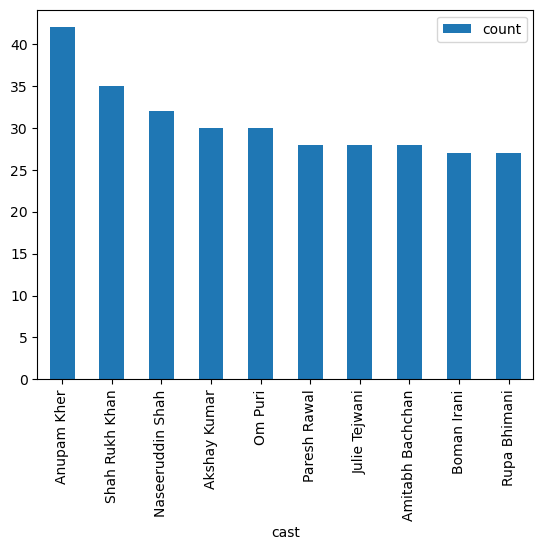

In [93]:
movie_cast_count.sort_values(by = ['count'], ascending = False).head(10).plot.bar()
#movie_cast_count.sort_values(by = ['count'], ascending = False).head(10).to_excel('top_10_movie_cast.xlsx')

In [114]:
## TOP 10 TV SHOW ACTORS
tv_show_cast = netflix[netflix['type'] == 'TV Show']

In [110]:
string = str()
for i in tv_show_cast['cast'].dropna():
    string += i + ','
cast_list = string.split(',')
cast_list.pop()
l1 = list()
for i in cast_list:
    l1.append(i.strip())
l1
tv_show_cast_df = pd.DataFrame(l1)
tv_show_cast_df.columns = ['cast']

tv_show_cast_count = pd.DataFrame(tv_show_cast_df.groupby('cast')['cast'].count())
tv_show_cast_count.columns = ['count']
tv_show_cast_count.sort_values(by = ['count'], ascending = False).head(10)

,count
cast,
Takahiro Sakurai,25
Yuki Kaji,19
Daisuke Ono,17
Ai Kayano,17
Junichi Suwabe,17
Yuichi Nakamura,16
Jun Fukuyama,15
Yoshimasa Hosoya,15
David Attenborough,14


<AxesSubplot:xlabel='cast'>

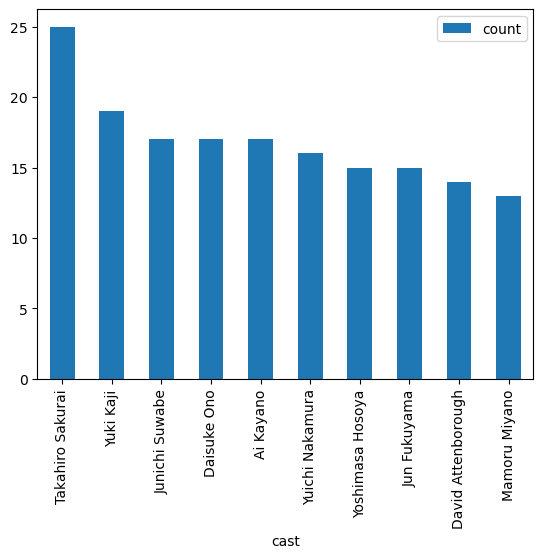

In [96]:
tv_show_cast_count.sort_values(by = ['count'], ascending = False).head(10).plot.bar()
#tv_show_cast_count.sort_values(by = ['count'], ascending = False).head(10).to_excel('top_10_tv_show_cast.xlsx')

In [122]:
# TOP 10 DIRECTORS

director_df = pd.DataFrame(netflix['director'].dropna())
string = str()
for i in director_df['director']:
    string += i + ','
director_list = string.split(',')
director_list.pop()
l1 = list()
for i in director_list:
    l1.append(i.strip())
l1
director_df = pd.DataFrame(l1)
director_df.columns = ['director']
director_df

,director
0,Kirsten Johnson
1,Julien Leclercq
2,Mike Flanagan
3,Robert Cullen
4,José Luis Ucha
...,...
6973,Majid Al Ansari
6974,David Fincher
6975,Ruben Fleischer
6976,Peter Hewitt


In [123]:
director_df_c =pd.DataFrame(director_df.groupby('director')['director'].count())
director_df_c.columns = ['count']
director_df_c.sort_values(by = ['count'], ascending = False).head(10)

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12


<AxesSubplot:xlabel='director'>

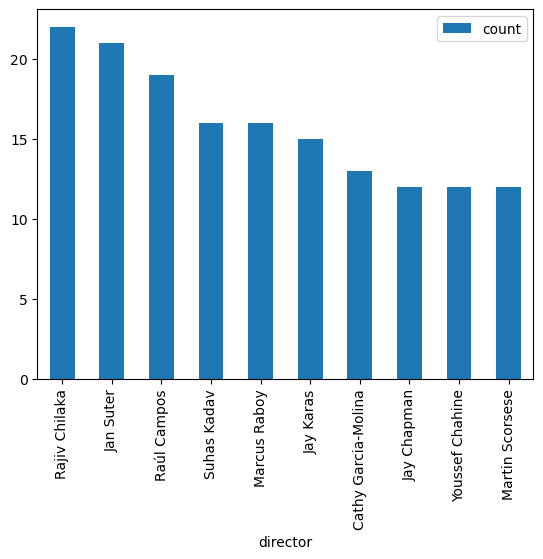

In [124]:
director_df_c.sort_values(by = ['count'], ascending = False).head(10).plot.bar()
#director_df_c.sort_values(by = ['count'], ascending = False).head(10).to_excel('top_10_directors.xlsx')

In [125]:
# Directors in Movies and TV Shows
directors_netflix = pd.DataFrame(netflix.loc[:,['type','director']])
directors_netflix.dropna(inplace = True)
directors_netflix

,type,director
0,Movie,Kirsten Johnson
2,TV Show,Julien Leclercq
5,TV Show,Mike Flanagan
6,Movie,"Robert Cullen, José Luis Ucha"
7,Movie,Haile Gerima
...,...,...
8801,Movie,Majid Al Ansari
8802,Movie,David Fincher
8804,Movie,Ruben Fleischer
8805,Movie,Peter Hewitt


In [98]:
## TOP 10 MOVIE DIRECTORS
movie_directors = directors_netflix[directors_netflix['type'] == 'Movie']
movie_directors

,type,director
0,Movie,Kirsten Johnson
6,Movie,"Robert Cullen, José Luis Ucha"
7,Movie,Haile Gerima
9,Movie,Theodore Melfi
12,Movie,Christian Schwochow
...,...,...
8801,Movie,Majid Al Ansari
8802,Movie,David Fincher
8804,Movie,Ruben Fleischer
8805,Movie,Peter Hewitt


In [109]:
string = str()
for i in movie_directors['director']:
    string += i+','
dir_list = string.split(',')
dir_list.pop()
l1 = list()
for i in dir_list:
    l1.append(i.strip())
l1
movie_directors_df = pd.DataFrame(l1)
movie_directors_df.columns = ['director']

movie_directors_df

,director
0,Kirsten Johnson
1,Robert Cullen
2,José Luis Ucha
3,Haile Gerima
4,Theodore Melfi
...,...
6661,Majid Al Ansari
6662,David Fincher
6663,Ruben Fleischer
6664,Peter Hewitt


In [309]:
movie_directors_count = pd.DataFrame(movie_directors_df.groupby('director')['director'].count())
movie_directors_count.columns = ['count']
movie_directors_count.sort_values(by = ['count'], ascending = False).head(10)

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12


<AxesSubplot:xlabel='director'>

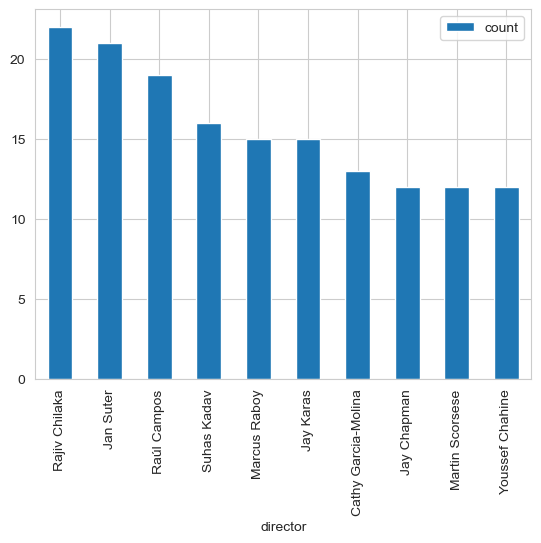

In [310]:
movie_directors_count.sort_values(by = ['count'], ascending = False).head(10).plot.bar()
#movie_directors_count.sort_values(by = ['count'], ascending = False).head(10).to_excel('top_10_movie_directors.xlsx')

In [116]:
## TOP 10 TV SHOW DIRECTORS
tv_show_directors = directors_netflix[directors_netflix['type'] == 'TV Show']
tv_show_directors

,type,director
2,TV Show,Julien Leclercq
5,TV Show,Mike Flanagan
8,TV Show,Andy Devonshire
11,TV Show,Kongkiat Komesiri
20,TV Show,Olivier Megaton
...,...,...
8235,TV Show,Bumpy
8293,TV Show,Michael Samuels
8302,TV Show,Mark Tonderai
8549,TV Show,"Ken Burns, Lynn Novick"


In [117]:
string = str()
for i in tv_show_directors['director']:
    string += i+','
dir_list = string.split(',')
dir_list.pop()
l1 = list()
for i in dir_list:
    l1.append(i.strip())
l1
tv_show_directors_df = pd.DataFrame(l1)
tv_show_directors_df.columns = ['director']

tv_show_directors_df

,director
0,Julien Leclercq
1,Mike Flanagan
2,Andy Devonshire
3,Kongkiat Komesiri
4,Olivier Megaton
...,...
307,Michael Samuels
308,Mark Tonderai
309,Ken Burns
310,Lynn Novick


In [313]:
tv_show_directors_count = pd.DataFrame(tv_show_directors_df.groupby('director')['director'].count())
tv_show_directors_count.columns = ['count']
tv_show_directors_count.sort_values(by = ['count'], ascending = False).head(10)

,count
director,
Alastair Fothergill,3
Ken Burns,3
Stan Lathan,2
Hsu Fu-chun,2
Lynn Novick,2
Rob Seidenglanz,2
Iginio Straffi,2
Jung-ah Im,2
Shin Won-ho,2


<AxesSubplot:xlabel='director'>

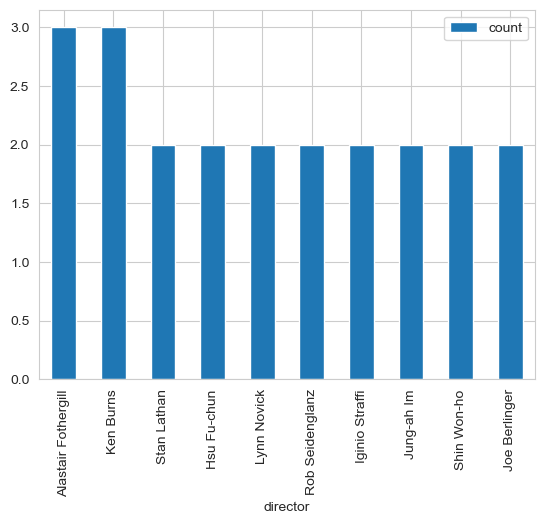

In [314]:
tv_show_directors_count.sort_values(by = ['count'], ascending = False).head(10).plot.bar()
#tv_show_directors_count.sort_values(by = ['count'], ascending = False).head(10).to_excel('top_10_tv_show_directors.xlsx')

# Does Netflix has more focus on TV Shows than movies in recent years.

In [278]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [282]:
focus = netflix[['type','title','date_added','release_year','year_added']].dropna()
#focus.to_excel('focus.xlsx')

# For KPI's

In [199]:
# Total TV Shows
movie_dcount = netflix[netflix['type'] == 'Movie'].show_id.count()
# Total TV Shows
tv_show_dcount = netflix[netflix['type'] == 'TV Show'].show_id.count()
# Total countires
countries_dcount = netflix.country.dropna().nunique()
# Total Genres
genre_dcount = listed_in_df.listed_in.dropna().nunique()
# Number of Directors
director_dcount = director_df.director.nunique()
# Number of cast
cast_dcount = cast_df.cast.nunique()

In [200]:
d = {'Variable':['Country','Genre','Movie','TV Show','Director','Cast'],'Count': [countries_dcount,genre_dcount,movie_dcount,tv_show_dcount,director_dcount,cast_dcount]}
KPI = pd.DataFrame(d)
KPI.to_excel('KPI.xlsx')